In [ ]:
exclude = ['non-visual artist single images', '.DS_Store']

In [45]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

class ArtLoader:
    """Load in art from artists as an array, batched and ready for tf"""
    
    def __init__(self, data_path):
        """set the path to the data directory"""
        # remove slash if it exists, accounted for in code below
        if data_path[-1] == '/':
            data_path = data_path[:-1]
        self.data_path = data_path

    def get_ponds(self, artist_name):
        """read in images from the prompt 
        'A beautiful painting of a waterlily pond, {artist}, Trending on artstation'
        for a particluar artist"""
        all_img_paths = os.listdir(f'{self.data_path}/{artist_name}')
        pond_img_list = [img_to_array(load_img(f'{self.data_path}/{artist_name}/{img_path}')) 
                         for img_path in all_img_paths  
                         if img_path[-5] in ['1', '2', '3']]
        return np.array(pond_img_list)
    
    def get_buildings(self, artist_name):
        """read in images from the prompt 
        'A beautiful painting of a building in a serene landscape, {artist}, Trending on artstation'
        for a particluar artist"""
        all_img_paths = os.listdir(f'{self.data_path}/{artist_name}')
        pond_img_list = [img_to_array(load_img(f'{self.data_path}/{artist_name}/{img_path}')) 
                         for img_path in all_img_paths  
                         if img_path[-5] in ['4', '5', '6']]
        return np.array(pond_img_list)

#def get_buildings(artist_path):

In [48]:
art_loader = ArtLoader(data_path = '../raw_data/batch 1')

test_ponds = art_loader.get_ponds('Robert_Hubert')

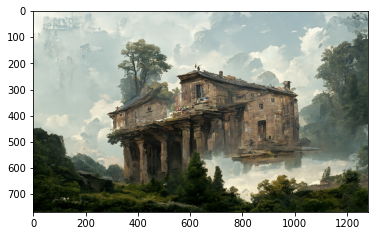

In [51]:
import matplotlib.pyplot as plt
plt.imshow(test_ponds[0].astype(int))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50


topless_resnet = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling=None, #avg, max
)

2022-04-29 15:25:37.861522: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94781440/94765736 [==============================] - 17s 0us/step


In [ ]:
model = Sequential([
    Resizing(224, 224),
    topless_resnet,
    
])

In [55]:
test_features = model(test_ponds)

In [57]:
test_features.shape

TensorShape([3, 7, 7, 2048])

In [6]:
# resize
# get features

['Robert_Hubert2.png',
 'Robert_Hubert3.png',
 'Robert_Hubert1.png',
 'Robert_Hubert4.png',
 'Robert_Hubert5.png',
 'Robert_Hubert6.png']

In [ ]:
# prompts
artist = ""
pond = f'A beautiful painting of a waterlily pond, {artist}, Trending on artstation'
building = f'A beautiful painting of a building in a serene landscape, {artist}, Trending on artstation'